<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/rain_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection

In [1]:
import pandas as pd
file_id = '1ha6-YJq02MBaSPgTSPg3kTqXNI0TYzqi'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)


# Data Processing

In [2]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [4]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [5]:
data.isnull().sum()

,0
DATE,0
PRCP,3
TMAX,0
TMIN,0
RAIN,3


In [6]:
data.duplicated().sum()

0

# Data Cleaning

In [7]:
data.dropna(inplace=True)   #overwrite dataset

In [8]:
data.isnull().sum()

,0
DATE,0
PRCP,0
TMAX,0
TMIN,0
RAIN,0


# Data Formating

In [9]:
#changing columns to neccessary data type
data = data.astype({'DATE':'datetime64[ns]','RAIN': 'int16'})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25548 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25548 non-null  int64         
 3   TMIN    25548 non-null  int64         
 4   RAIN    25548 non-null  int16         
dtypes: datetime64[ns](1), float64(1), int16(1), int64(2)
memory usage: 1.0 MB


# Exploratory Data Analysis (EDA)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Mounthly rainfall

In [12]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [13]:
data['MONTH'] = data['DATE'].dt.month

In [14]:
data.head(20)

,DATE,PRCP,TMAX,TMIN,RAIN,MONTH
0,1948-01-01,0.47,51,42,1,1
1,1948-01-02,0.59,45,36,1,1
2,1948-01-03,0.42,45,35,1,1
3,1948-01-04,0.31,45,34,1,1
4,1948-01-05,0.17,45,32,1,1
5,1948-01-06,0.44,48,39,1,1
6,1948-01-07,0.41,50,40,1,1
7,1948-01-08,0.04,48,35,1,1
8,1948-01-09,0.12,50,31,1,1
9,1948-01-10,0.74,43,34,1,1


In [15]:
#create a pivot table
rainfall_pivot = data.pivot_table(index=['RAIN'], columns=['MONTH'], aggfunc='size', fill_value=0)

In [16]:
rainfall_pivot

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
RAIN,,,,,,,,,,,,
0,872,875,958,1102,1399,1466,1827,1757,1490,1220,836,846
1,1298,1103,1212,998,771,632,343,413,609,950,1264,1307


In [17]:
#select the row where 'RAIN' is 1
rainfall_row = rainfall_pivot.loc[1]
rainfall_row

,1
MONTH,
1,1298
2,1103
3,1212
4,998
5,771
6,632
7,343
8,413
9,609


In [18]:
#Extrac the keys(months) and value(counts)
months = rainfall_row.keys()
counts = rainfall_row.values


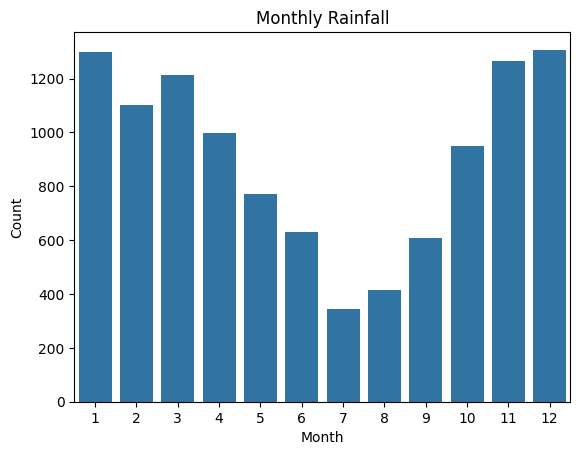

In [19]:
#create a bar plot
sns.barplot(x=months, y=counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Rainfall')
plt.show()

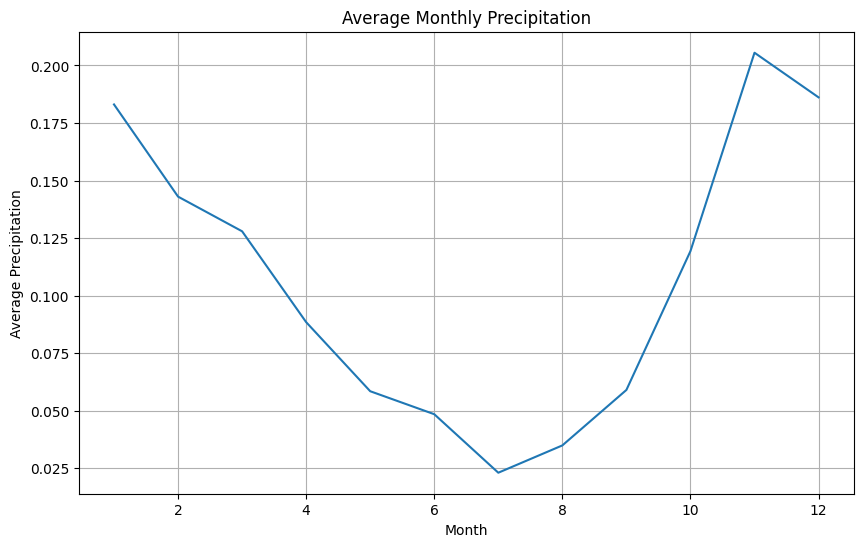

In [20]:
#Monthly Percipitation
#Calculate the average precipitation by mouth
average_precipitation = data.groupby('MONTH')['PRCP'].mean().reset_index()

#create a line plot using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='PRCP', data=average_precipitation)
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.title('Average Monthly Precipitation')
plt.grid(True)
plt.show()


Monthly max and min Temperature

In [21]:
#calculate the average max and min temp by mouth
average_temp = data.groupby('MONTH')[['TMAX', 'TMIN']].mean().reset_index()



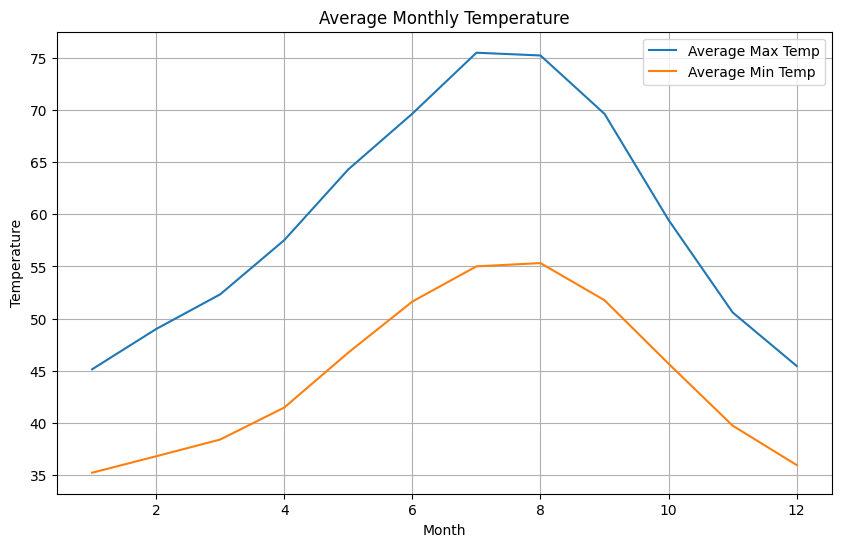

In [22]:
#create line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='TMAX', data=average_temp, label='Average Max Temp')
sns.lineplot(x='MONTH', y='TMIN', data=average_temp, label='Average Min Temp')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Average Monthly Temperature')
plt.legend()
plt.grid(True)

In [24]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [27]:
data['YEAR'] = data['DATE'].dt.year

In [28]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,MONTH,YEAR
0,1948-01-01,0.47,51,42,1,1,1948
1,1948-01-02,0.59,45,36,1,1,1948
2,1948-01-03,0.42,45,35,1,1,1948
3,1948-01-04,0.31,45,34,1,1,1948
4,1948-01-05,0.17,45,32,1,1,1948


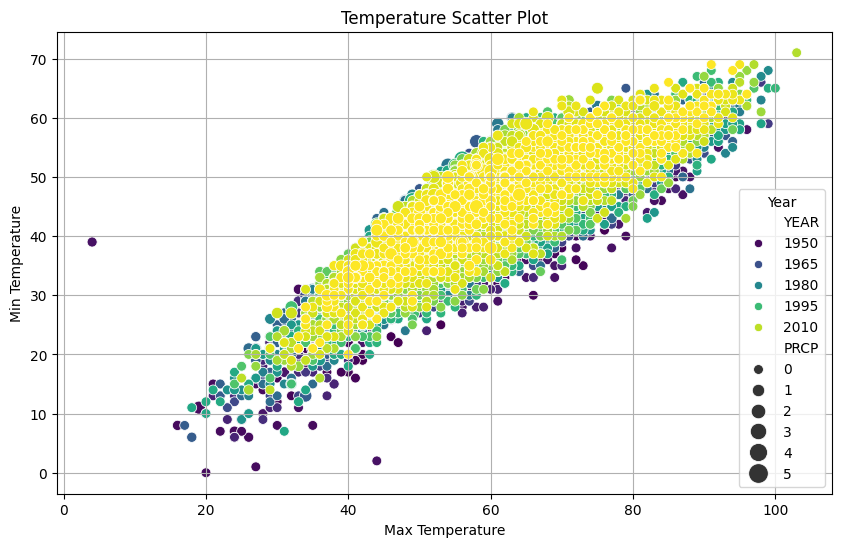

In [30]:
#create a scatter plot using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TMAX', y='TMIN', data=data, hue='YEAR', palette='viridis', size='PRCP', sizes=(50, 200))
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.title('Temperature Scatter Plot')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [32]:
#Calculate average yearly precipitation
yearly_precipitation = data.groupby('YEAR')['PRCP'].mean().reset_index()
yearly_precipitation

,YEAR,PRCP
0,1948,0.125109
1,1949,0.088932
2,1950,0.151068
3,1951,0.110411
4,1952,0.064973
...,...,...
65,2013,0.089205
66,2014,0.132877
67,2015,0.122822
68,2016,0.123443


Text(0.5, 1.0, 'Average Yearly Precipitation')

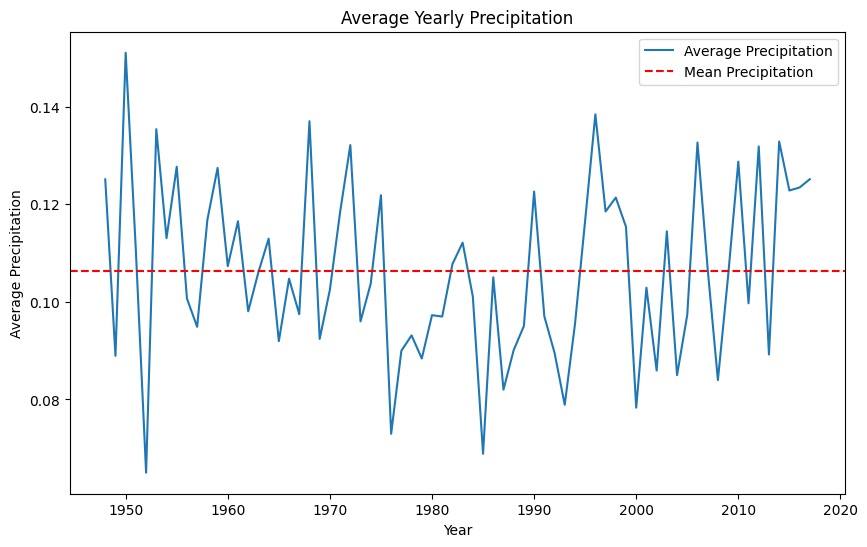

In [36]:
#create plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='PRCP', data=yearly_precipitation, label='Average Precipitation')
plt.axhline(y=yearly_precipitation['PRCP'].mean(), color='red', linestyle='--', label='Mean Precipitation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Yearly Precipitation')


#feature Engineering


In [38]:
#convert the date column into a float data type
data['DATE'] = pd.to_datetime(data['DATE']).astype(int)/10**9
print(data.dtypes)


DATE     float64
PRCP     float64
TMAX       int64
TMIN       int64
RAIN       int16
MONTH      int32
YEAR       int32
dtype: object


In [42]:
data.shape

(25548, 7)

#Features and target


In [39]:
#separate features (predictions) and target and var
X = data.drop(columns=['RAIN'])
y = data['RAIN']

# Data Spliting

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (20438, 6)
X_test shape: (5110, 6)
y_train shape: (20438,)
y_test shape: (5110,)


# Model

In [43]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

#initialize the logistic reg model
logreg = LogisticRegression(random_state=42)

#train the model
logreg.fit(X_train, y_train)

#make predictions
y_pred = logreg.predict(X_test)


In [49]:
y_pred[:50
       ]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int16)